In [45]:
import pandas as pd
import numpy as np          
import decimal
import datetime 
import matplotlib.pyplot as plt

In [46]:
#Loading Data

In [47]:
df_stock_price= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Stock data.csv')

In [48]:
df_inflation= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/inflation data.csv')

In [49]:
df_CPI= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/CPI index.csv')

In [50]:
df_stock_price = df_stock_price[['Date', 'StockPrice', 'Trading days']]

In [51]:
df_inflation = df_inflation[['Date_inf', 'Inflation_variation']]

In [52]:
df_CPI = df_CPI[['Date', 'CPI']]

In [53]:
df_stock_price

,Date,StockPrice,Trading days
0,02/01/2009,313.34,1
1,05/01/2009,311.91,2
2,06/01/2009,314.04,3
3,07/01/2009,319.58,4
4,08/01/2009,314.15,5
...,...,...,...
3361,24/06/2022,"1,185.48",3362
3362,27/06/2022,"1,202.82",3363
3363,28/06/2022,"1,218.10",3364
3364,29/06/2022,"1,218.09",3365


In [54]:
print(df_stock_price.dtypes)

Date            object
StockPrice      object
Trading days     int64
dtype: object


In [55]:
df_inflation

,Date_inf,Inflation_variation
0,01/01/2009,0.32
1,01/02/2009,1.17
2,01/03/2009,-0.17
3,01/04/2009,0.35
4,01/05/2009,0.44
...,...,...
157,01/02/2022,1.00
158,01/03/2022,0.70
159,01/04/2022,0.18
160,01/05/2022,0.38


In [56]:
print(df_inflation.dtypes)

Date_inf                object
Inflation_variation    float64
dtype: object


In [57]:
#Processing Data

In [58]:
#change format to '%d/%m/%Y'
df_stock_price["Date"]=pd.to_datetime(df_stock_price["Date"].astype(str), format='%d/%m/%Y')


In [59]:
df_inflation["Date_inf"]=pd.to_datetime(df_inflation["Date_inf"].astype(str), format='%d/%m/%Y')

In [60]:
#change data type from string to dateitme
df_stock_price["Date"] = pd.to_datetime(df_stock_price["Date"])

In [61]:
#change data type from string to dateitme
df_inflation["Date_inf"] = pd.to_datetime(df_inflation["Date_inf"])

In [62]:
df_stock_price["Date"] = df_stock_price["Date"].astype('datetime64[ns]')

In [63]:
df_inflation["Date_inf"] = df_inflation["Date_inf"].astype('datetime64[ns]')

In [64]:
#change '' to 0.00
df_stock_price['StockPrice']=df_stock_price['StockPrice'].str.replace(',','').replace('','0.00')

In [65]:
#df_stock_price['StockPrice']=df_stock_price['StockPrice'].str

In [66]:
df_stock_price['StockPrice'] = df_stock_price['StockPrice'].astype(float)

In [67]:
print(df_stock_price.dtypes)

Date            datetime64[ns]
StockPrice             float64
Trading days             int64
dtype: object


In [68]:
df_stock_price

,Date,StockPrice,Trading days
0,2009-01-02,313.34,1
1,2009-01-05,311.91,2
2,2009-01-06,314.04,3
3,2009-01-07,319.58,4
4,2009-01-08,314.15,5
...,...,...,...
3361,2022-06-24,1185.48,3362
3362,2022-06-27,1202.82,3363
3363,2022-06-28,1218.10,3364
3364,2022-06-29,1218.09,3365


In [69]:
#Use stock price to calculate RSI 

In [70]:
import ta


# calculate the RSI using ta library
df_stock_price['RSI'] = ta.momentum.RSIIndicator(df_stock_price['StockPrice'], window=14).rsi()

# print the RSI values
print(df_stock_price['RSI'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3361    35.370958
3362    40.420868
3363    44.533727
3364    44.531560
3365    40.214401
Name: RSI, Length: 3366, dtype: float64


In [71]:
df_stock_price

,Date,StockPrice,Trading days,RSI
0,2009-01-02,313.34,1,NaN
1,2009-01-05,311.91,2,NaN
2,2009-01-06,314.04,3,NaN
3,2009-01-07,319.58,4,NaN
4,2009-01-08,314.15,5,NaN
...,...,...,...,...
3361,2022-06-24,1185.48,3362,35.370958
3362,2022-06-27,1202.82,3363,40.420868
3363,2022-06-28,1218.10,3364,44.533727
3364,2022-06-29,1218.09,3365,44.531560


Text(0.5, 1.0, 'RSI_using_stock_price')

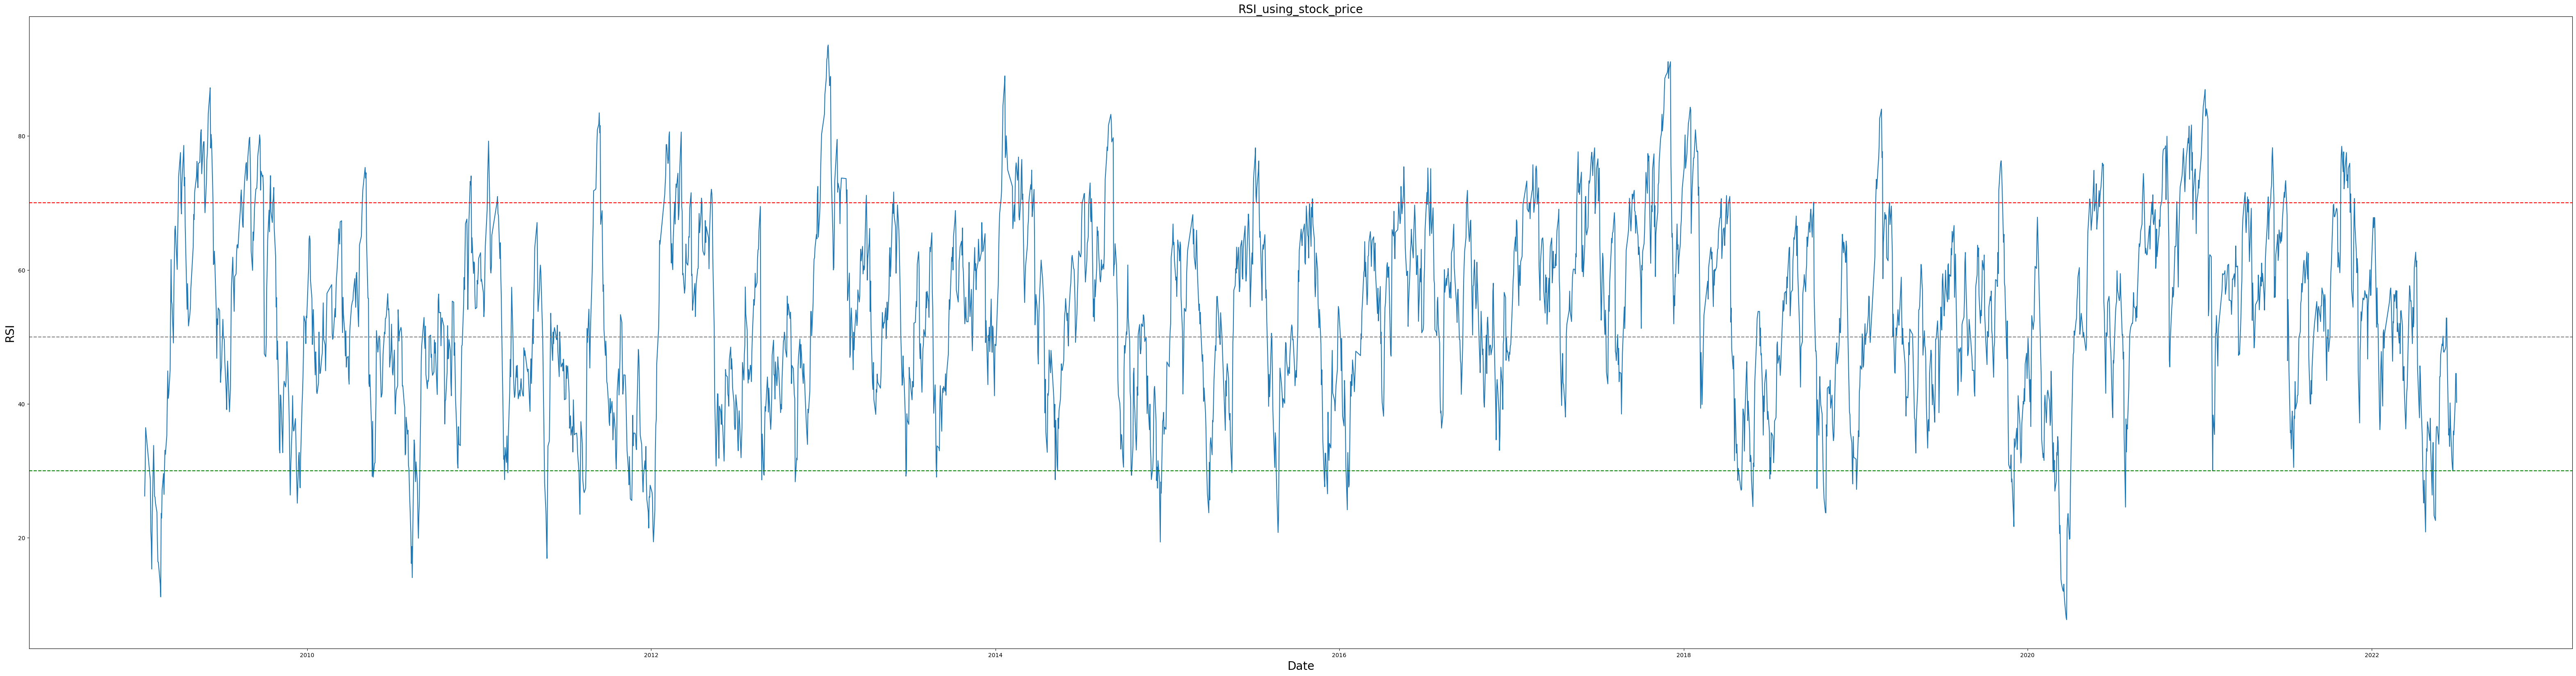

In [72]:
import matplotlib.pyplot as plt
# create a line chart
fig = plt.figure(figsize=(80, 20))
plt.plot(df_stock_price['Date'], df_stock_price['RSI'])
# add labels and a title
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.xlabel('Date',  fontsize=20)
plt.ylabel('RSI',  fontsize=20)
plt.title('RSI_using_stock_price',  fontsize=20)

In [73]:
print(df_inflation.dtypes)

Date_inf               datetime64[ns]
Inflation_variation           float64
dtype: object


In [74]:
#Use inflation to calculate RSI

In [75]:
df_inflation

,Date_inf,Inflation_variation
0,2009-01-01,0.32
1,2009-02-01,1.17
2,2009-03-01,-0.17
3,2009-04-01,0.35
4,2009-05-01,0.44
...,...,...
157,2022-02-01,1.00
158,2022-03-01,0.70
159,2022-04-01,0.18
160,2022-05-01,0.38


In [76]:
#RSI is calculated by Inflation
import ta
# calculate the RSI using ta library
df_inflation['RSI'] = ta.momentum.RSIIndicator(df_inflation['Inflation_variation'], window=14).rsi()

# print the RSI values
print(df_inflation['RSI'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
157    56.142488
158    53.671725
159    49.597318
160    51.133839
161    53.500051
Name: RSI, Length: 162, dtype: float64


In [77]:
df_inflation

,Date_inf,Inflation_variation,RSI
0,2009-01-01,0.32,NaN
1,2009-02-01,1.17,NaN
2,2009-03-01,-0.17,NaN
3,2009-04-01,0.35,NaN
4,2009-05-01,0.44,NaN
...,...,...,...
157,2022-02-01,1.00,56.142488
158,2022-03-01,0.70,53.671725
159,2022-04-01,0.18,49.597318
160,2022-05-01,0.38,51.133839


Text(0.5, 1.0, 'RSI_using_inflation')

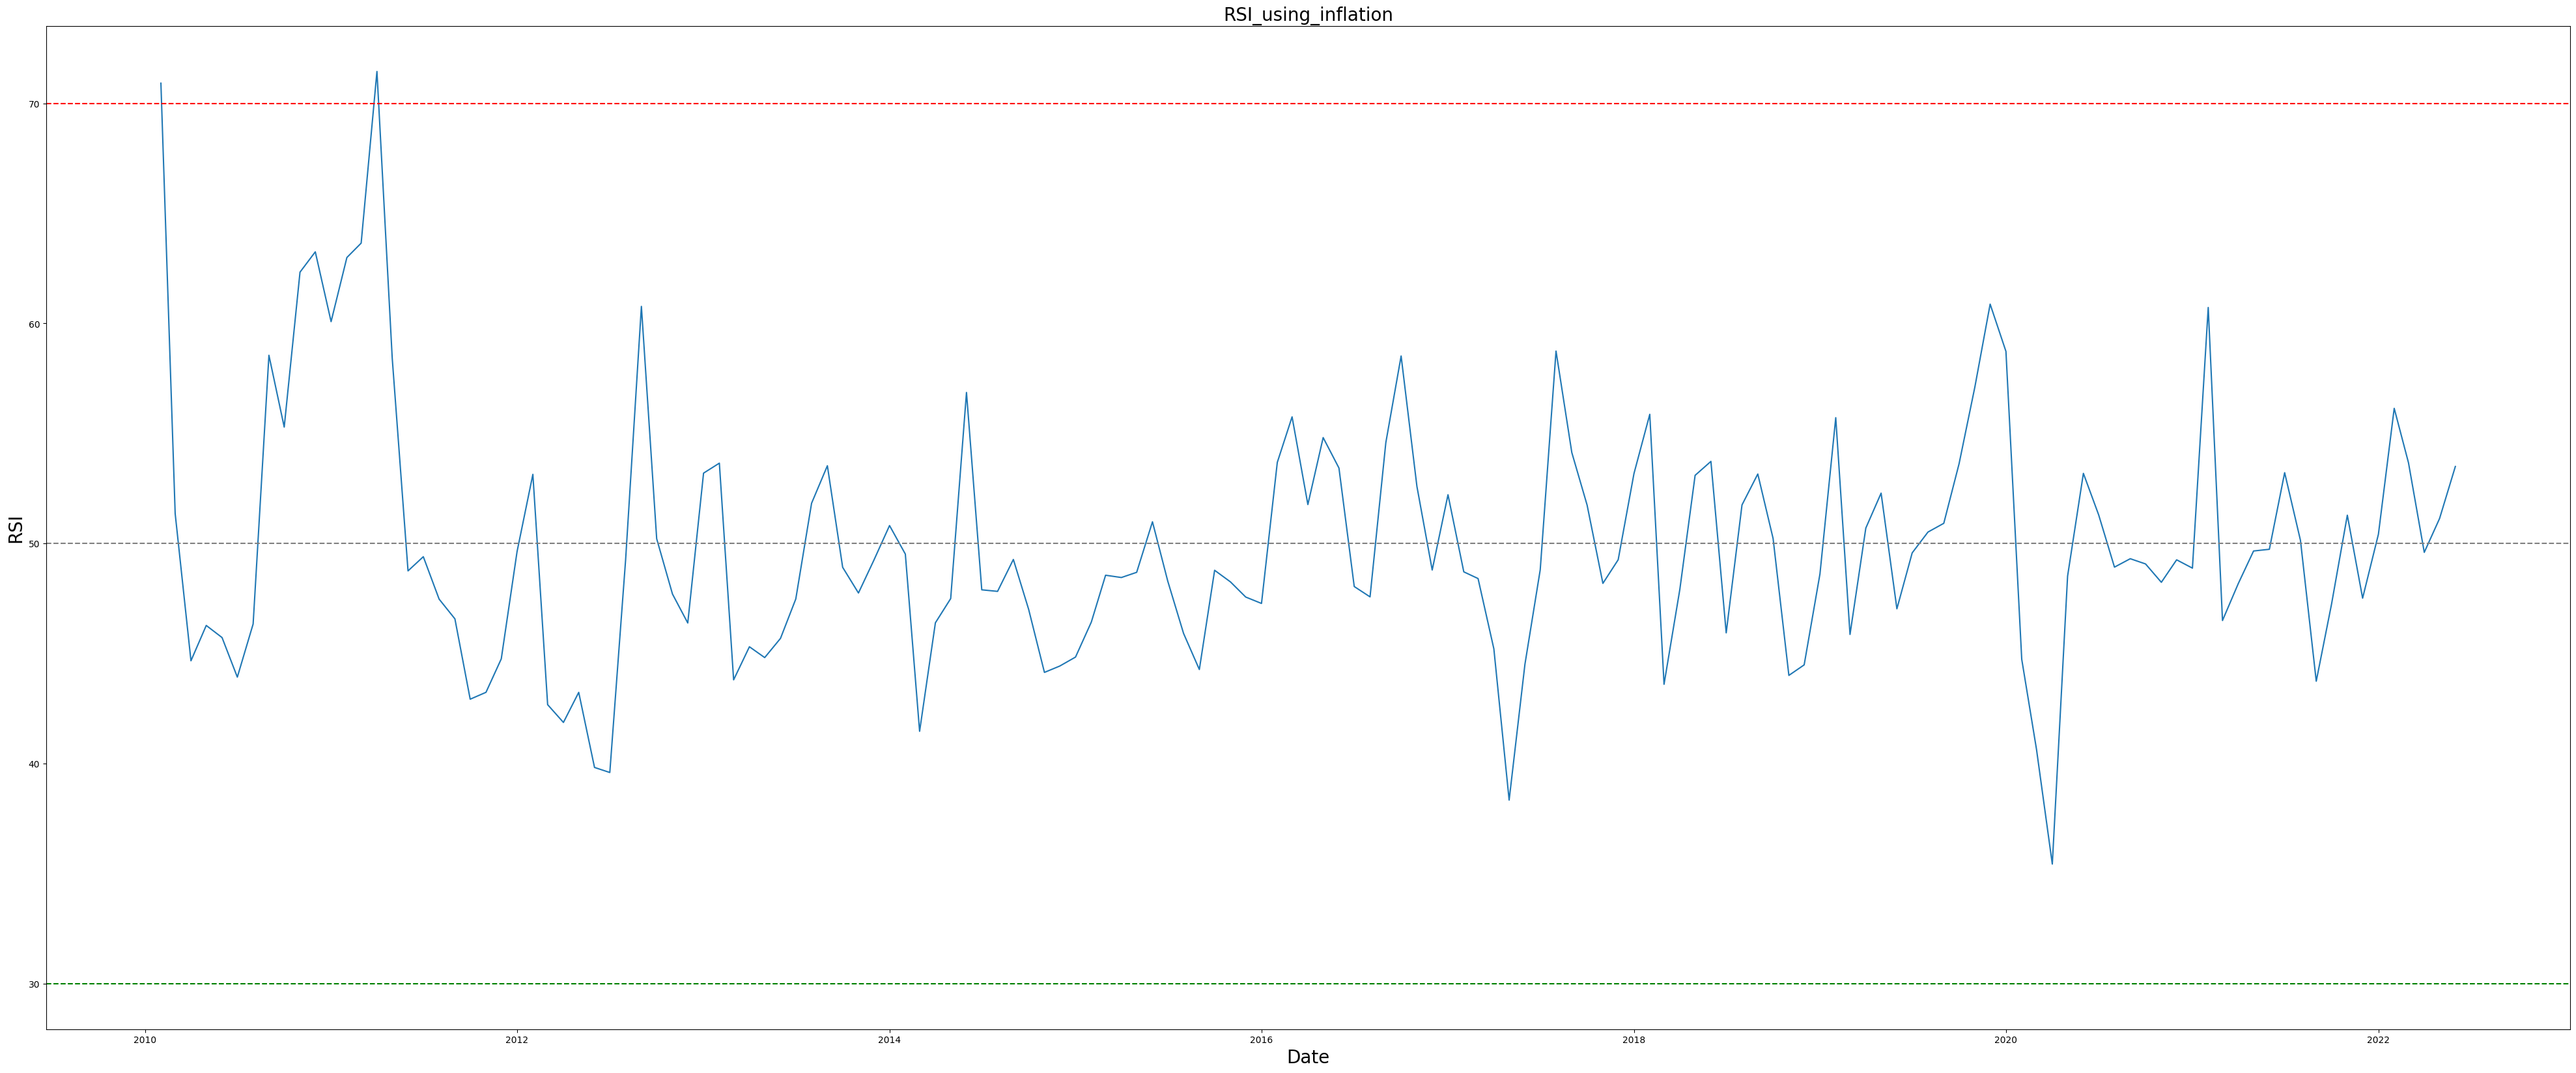

In [78]:
# create a line chart
fig = plt.figure(figsize=(50, 20))
plt.plot(df_inflation['Date_inf'], df_inflation['RSI'])
# add labels and a title
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.xlabel('Date',  fontsize=20)
plt.ylabel('RSI',  fontsize=20)
plt.title('RSI_using_inflation',  fontsize=20)